In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import accuracy_score as acc_sc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
## 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier      ## DecisionTree 

from sklearn import svm                              ## SVM

from sklearn.ensemble import GradientBoostingClassifier ## GradientBoosting

from lightgbm import LGBMClassifier                   ## LGBM

## 평가지표
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report ## 혼동행렬
from sklearn.metrics import accuracy_score 
from sklearn.tree import export_graphviz

In [4]:
# 데이터 불러오기
heart_dt = pd.read_csv('/Users/yongjaegim/Desktop/심장질환/heart.csv')

# 심장 질환 dataset의 각 컬럼 설명
- **age** 
    - 나이
    <br><br/> 
- **sex** 
    - 성별 
        - 여자 = 0, 남자 = 1
    <br><br/>       
- **cp** 
    - 가슴 통증(chest pain) 종류
        - 0 : asymptomatic 무증상
        - 1 : atypical angina 일반적이지 않은 협심증
        - 2 : non-anginal pain 협심증이 아닌 통증
        - 3 : typical angina 일반적인 협심증
          <br><br/>
- **trestbps** (resting blood pressure) 
    - 휴식 중 혈압(mmHg)
    <br><br/>
- **chol** (serum cholestoral)
    - 혈중 콜레스테롤 (mg/dl)
    <br><br/>
- **fbs** (fasting blood sugar)
    - 공복 중 혈당 
        - 120 mg/dl 이하일 시 = 0, 초과일 시 = 1
        <br><br/>
- **restecg** (resting electrocardiographic) 
    - 휴식 중 심전도 결과 
        - 0: Estes' 기준에 의한 좌심실 비대 가능성이 있거나 확실함
         - showing probable or definite left ventricular hypertrophy by Estes' criteria
        - 1: 정상
        - 2: ST-T파 이상(T파 반전 및/또는 ST 상승 또는 하강 > 0.05mV) 
         - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        <br><br/>
- **thalach** (maximum heart rate achieved)
    - 최대 심박수
    <br><br/>
- **exang** (exercise induced angina)
    - 활동으로 인한  협심증 여부 
        - 없음 = 0, 있음 = 1
        <br><br/>
- **oldpeak** (ST depression induced by exercise relative to rest)
    - 휴식 대비 운동으로 인한 ST 하강
    <br><br/>
- **slope** (the slope of the peak exercise ST segment)
    - 활동 ST 분절 피크의 기울기
        - 0: downsloping 하강
        - 1: flat 평탄
        - 2: upsloping 상승
        <br><br/>
- **ca** (number of major vessels colored by flouroscopy)
    - 형광 투시로 확인된 주요 혈관 수 
        - 0~3 개 
        <br><br/>
- **thal** (thalassemia) 
    - 지중해빈혈 여부
        - 0 = Null
        - 1 = normal 정상
        - 2 = fixed defect 고정 결함
        - 3 = reversable defect 가역 결함
        <br><br/>
- **target** 
    - 심장 질환 진단 여부
        - 0: < 50% diameter narrowing
        - 1: > 50% diameter narrowing

In [5]:
# thal과 ca에서 null값이 다른값으로 대체되었음

# EDA

In [6]:
#시각화를 위한 seaborn, plt import
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 맥os에서 한글화를 위한 작업
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [8]:
# test_dt에 heart_dt copy
test_dt =heart_dt.copy()

In [9]:
# 범주형 연속형 변수 리스트 생성
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cate_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [10]:
len(num_col)

5

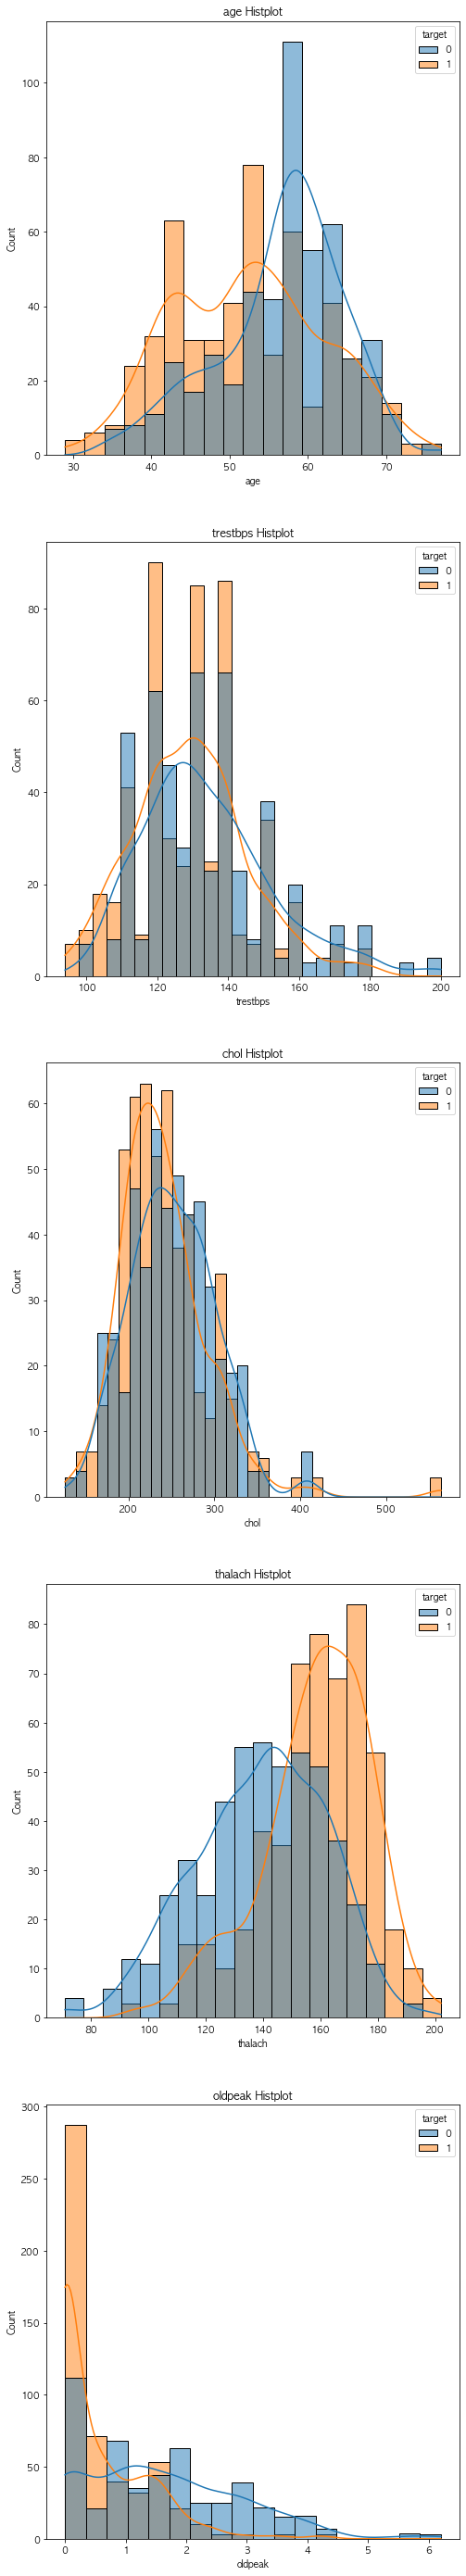

In [11]:
# 연속형 변수 시각화
plt.figure(figsize=(8,50))
for i in range(len(num_col)):
    plt.subplot(5,1,i+1)
    plt.title('{0} Histplot'.format(num_col[i]))
    sns.histplot(data = heart_dt, x = heart_dt['{0}'.format(num_col[i])], hue = heart_dt.target , kde = True)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


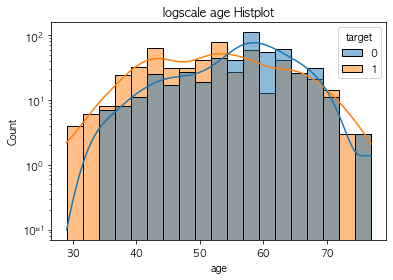

In [12]:
plt.title('logscale age Histplot'.format(num_col[i]))
sns.histplot(data = heart_dt, x = heart_dt.age, hue = heart_dt.target , kde = True)
plt.yscale('log')
# age 컬럼을 logscale을 통해 histplot 

<AxesSubplot:>

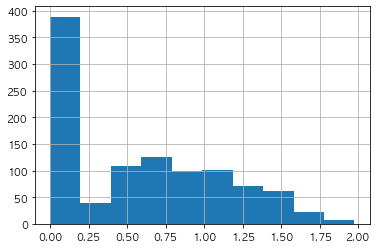

In [13]:
#우측 꼬리 분표로 이루어진 oldpeak log1p작업을 통해 정규 분포로 보기 위하여 변환 작업 
heart_dt.oldpeak = np.log1p(heart_dt.oldpeak)
heart_dt.oldpeak.hist()

In [14]:
#하지만 oldpeak의 대부분의 값이 0을 차지하고있어 정규분포를 이루지 못하고 있음
heart_dt.oldpeak.value_counts().head()

0.000000    329
0.788457     58
0.693147     51
0.470004     47
0.587787     44
Name: oldpeak, dtype: int64

<AxesSubplot:title={'center':'Modify oldpeak Histplot'}, xlabel='oldpeak', ylabel='Count'>

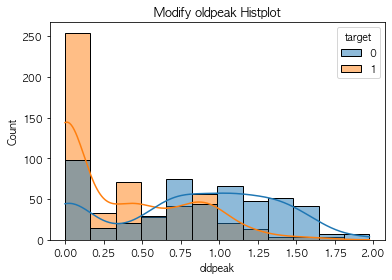

In [15]:
# Log1p작업을 통한 oldpeak의 histplot
plt.title('Modify oldpeak Histplot'.format(num_col[i]))
sns.histplot(data = heart_dt, x = heart_dt.oldpeak, hue = heart_dt.target , kde = True)

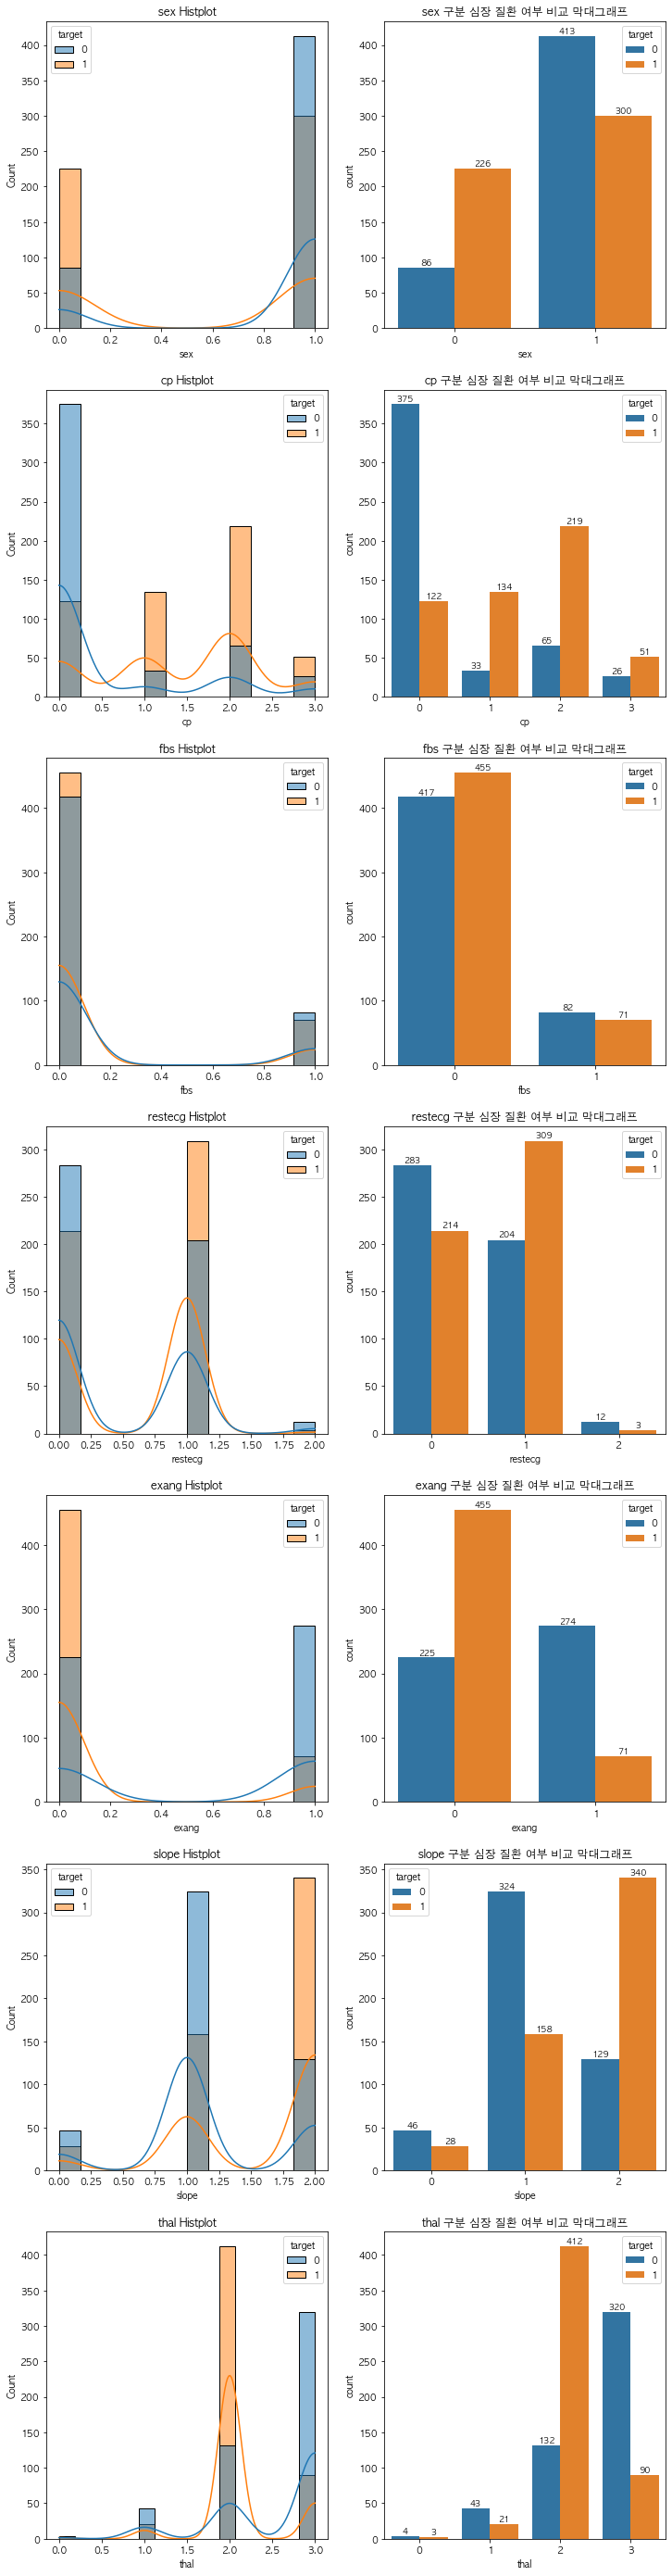

In [16]:
# 범주형 변수 시각화
plt.figure(figsize=(12,50))
for i in range(len(cate_col)): 
    plt.subplot(7,2,i+i+1)
    plt.title('{0} Histplot'.format(cate_col[i]))
    sns.histplot(data = heart_dt, x = heart_dt['{0}'.format(cate_col[i])], hue = heart_dt.target , kde = True)

    plt.subplot(7,2,i+i+2)
    plt.title('{0} 구분 심장 질환 여부 비교 막대그래프'.format(cate_col[i]))
    ax = sns.countplot(x=test_dt['{0}'.format(cate_col[i])], hue='target',data = heart_dt)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

age = 50 ~ 60사이를 기준으로 나이가 많을수록 심장질환을 여부가 낮아짐  
sex = 여성이 남성보다 심장질환을 갖고 있을 여부가 큼  
cp = 무증상일 경우 심장 질환일 확률이 낮음   
restecg = 휴식중 심전도 0(좌심실 비대 가능성 높음) 보다 1(정상)일 경우 심장질환을 갖고 있을 확률이 높음  
thal = 최대 심박수가 150을 기준으로 넘을 경우 심장질환이 있을 확률이 높음  
exang = 활동으로 인한 협심증 여부로 없다면(0) 있는 것(1) 보다 심장 질환을 갖고 있을 확률이 더 큼  
oldpeak = 0에 가까울수록 심장 질환을 갖고 있을 확률이 큼  
slope = slope가 2일 경우 심장질환을 갖고 있을 확률이 큼  
ca = ca값이 0에 가까울수록 심장질환을 갖고 있을 확률이 큼  
thal = thal 값이 2면 심장 질환을 갖고 있을 확률이 큼   
  
trestbps = 의미있는 데이터로 보이지 않음    
chol = 의미있는 데이터로 보이지 않음   
fbs = 의미있는 데이터로 보이지 않음 


## EDA 정리
유의미한 데이터 sex, cp, restecg, thalach, exang, oldpeak, slope, ca, thal, age  
무의미한 데이터 trestbps, chol, fbs

# 데이터 전처리

In [17]:
heart_dt.isnull().sum() # null값 확인
# null은 존재 하지 않음

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
heart_dt.thal.value_counts() # 결측치 0    7개확인

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [19]:
# 결측치 처리된 0 의 값을 thal의 평균값을 반올림 한 2의 값으로 대체
heart_dt.thal = np.where(heart_dt.thal == 0, round(heart_dt.thal.mean()), heart_dt.thal)

In [20]:
heart_dt.thal.value_counts()

2    551
3    410
1     64
Name: thal, dtype: int64

In [21]:
heart_dt.ca.value_counts()
# ca는 0 ~ 3개 존재 null값들을 4라는 값으로 대체되었음(수정 필요)
# 4는 null값 대체 필요

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [22]:
# round(반올림)을 사용하여 값 대체
heart_dt.ca = np.where(heart_dt['ca'] == 4, round(heart_dt.ca.mean()), heart_dt.ca)

heart_dt.ca.value_counts()
# 4 에 있는 값을 평균값의 반올림 값(1)로 대체

0    578
1    244
2    134
3     69
Name: ca, dtype: int64

In [23]:
# sex를 첫 기준 두번째로 target을 잡아 나머지 컬럼들에 대한 평균값 비교
heart_dt.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12]].groupby([heart_dt.sex, heart_dt.target]).mean()

age        cp    trestbps        chol       fbs   restecg  \
sex target                                                                    
0   0       59.058140  0.174419  146.488372  276.732558  0.267442  0.534884   
    1       54.628319  1.323009  128.836283  255.641593  0.084071  0.588496   
1   0       56.050847  0.547215  131.527845  245.995157  0.142857  0.440678   
    1       50.736667  1.420000  129.553333  229.933333  0.173333  0.606667   

               thalach     exang   oldpeak     slope        ca      thal  
sex target                                                                
0   0       142.348837  0.581395  0.900790  0.965116  1.313953  2.500000  
    1       154.057522  0.106195  0.366531  1.579646  0.300885  2.026549  
1   0       138.460048  0.542373  0.809266  1.208232  1.104116  2.566586  
    1       161.996667  0.156667  0.347399  1.603333  0.273333  2.210000

In [24]:
heart_dt.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [25]:
heart_dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,0.693147,2,2,3,0
1,53,1,0,140,203,1,0,155,1,1.410987,0,0,3,0
2,70,1,0,145,174,0,1,125,1,1.280934,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.064711,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.000000,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,1.335001,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,0.693147,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.000000,2,0,2,1


<AxesSubplot:>

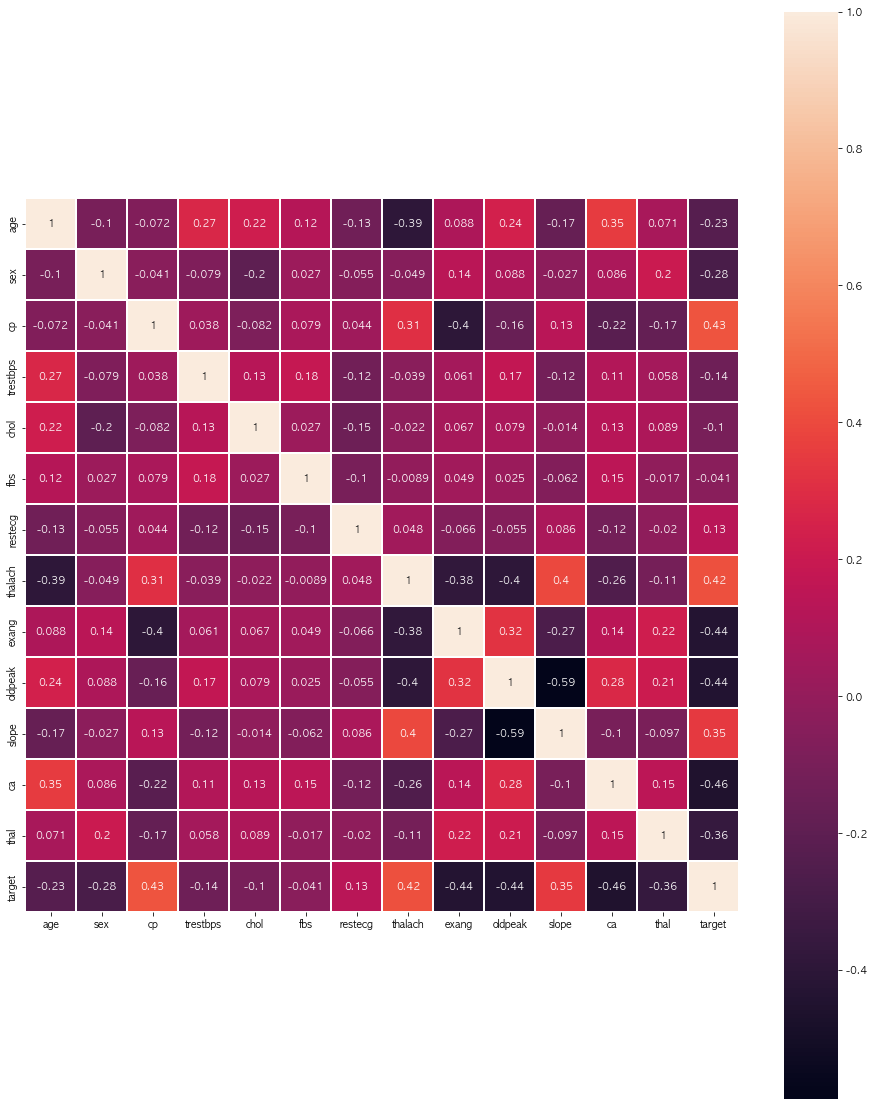

In [26]:
plt.figure(figsize=(16,20))
sns.heatmap(heart_dt.corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True)

### corr 결과
 - 모든 독립변수들 간의 상관계수는 0.5 이하, 높지않다고 나옴 상관은 없다고 보면 됨 

## 로지스틱 회귀

In [46]:
# EDA를 통해 드랍된 독립 변수들에 대한 logit 변환후 summary (로지스틱 회귀를 돌리기 위해 logit변환)
logit = sm.Logit(heart_dt.target,heart_dt.drop(['target','chol','fbs','trestbps'],axis=1))
result = logit.fit()

result.summary2()
# 왜 ols를 보지 않고 logit변환을 하여 summary를 볼까?
# 로지스틱회귀는 회귀보단 분류에 더 가까움 
# 종속변수 값이 현재 0,1로 이진(Binary)로 표현되어 있어 sm.OLS를 돌리게 되면 target에 대한 값들이 0과 1이 아닌 그 사이의 값을 가지게 됨
    # intercept(절편) + 알고자 하는 단일 독립변수의 값(Coef) = 0 ~ 1사이의 값

# 즉 0과 1로의 확실한 구분이 없는 주관적인 분석으로 밖에 해석이 되질 않음 ex) 0.5가 넘으면 1로 봐야하고 0.5 아래이면 0으로 봐야하나?
# 이러한 이유로 OLS를 사용할 수 없음 

Optimization terminated successfully.
         Current function value: 0.341296
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.507      
Dependent Variable: target           AIC:              719.6570   
Date:               2022-02-01 14:52 BIC:              768.9815   
No. Observations:   1025             Log-Likelihood:   -349.83    
Df Model:           9                LL-Null:          -710.12    
Df Residuals:       1015             LLR p-value:      2.5952e-149
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
--------------------------------------------------------------------
age         0.0010     0.0084    0.1163   0.9074   -0.0154    0.0174
sex        -1.5283     0.2347   -6.5103   0.0000   -1.9884   -1.0682
cp          0.7861     0.0987    7.9637   0.0000    0.5926    0.9795
restecg     0.4823     0.1844    2.6155   0.0089    0.1209    0.8438
thalach     0.0210     0.0035    5.9613   0.0000    0.0141    0.0279
exang      -0.9934     0.2182   -4.5520   0.0000   -1.4212   -0.5657
oldpeak    -1.0195     0.2364   -4.3125   0.0000   -1.4828   -0.5561
slope       0.6461     0.1893    3.4132   0.0006    0.2751    1.0170
ca         -1.2071     0.1383   -8.7289   0.0000   -1.4781   -0.9361
thal       -1.0326     0.1598   -6.4628   0.0000   -1.3458   -0.7195
==================================================================

"""

 - 결정계수는 0.507 높은 설명력을 보여주고 있진 않음( 하지만 사회과학에선 0.5의 설명력은 낮지 않은 설명력이라고 함)
 <br> </br>
 - Coef 즉 각 독립변수들의 로짓함수계수들을 뜻함(log를 취한 값) 
   - 0에서 멀어질수록 종속변수(target)에 영향력이 있다고 보며 0에 가까울수록 영향력이 없음
   - 현재 Coef값들은 오즈에 log를 취한 수(log(odds))임 
   - 즉 제대로 된 오즈비를 보기 위해선 np.exp를 거쳐 log를 벗겨내 지수함수로 바꿔 보아야 함
   
 - 각 독립변수들에 대한 Coef를 보았을 때 다음 오즈비를 구해 target에 어떠한 요인을 미치는지 알아보자

In [29]:
#오즈비를 구해보자 (odds ratio)
# 오즈(odds) 공식
# target 기준
# 1일 확률 / (1 - (1일 확률))(즉 0일 확률)
np.exp(result.params)

age        1.000972
sex        0.216913
cp         2.194732
restecg    1.619871
thalach    1.021201
exang      0.370307
oldpeak    0.360790
slope      1.908005
ca         0.299061
thal       0.356074
dtype: float64

In [30]:
# target에 가장 중요한 요인은 cp(2.19)가 가장중요
# 그다음 slope가 (1.90)로 2번째를 차지 
# 3 restecg(1.61)
# 즉 target이 1인 사람은 0인 사람보다 cp가 2.19배 높다
#  // slope가 1.9배 높다
#  // restecg가 1.61배 높다

In [31]:
# 데이터 분할
X = heart_dt.drop(['target','trestbps','fbs','chol'], axis=1)
y = heart_dt.target
print(X, y)

      age  sex  cp  restecg  thalach  exang   oldpeak  slope  ca  thal
0      52    1   0        1      168      0  0.693147      2   2     3
1      53    1   0        0      155      1  1.410987      0   0     3
2      70    1   0        1      125      1  1.280934      0   0     3
3      61    1   0        1      161      0  0.000000      2   1     3
4      62    0   0        1      106      0  1.064711      1   3     2
...   ...  ...  ..      ...      ...    ...       ...    ...  ..   ...
1020   59    1   1        1      164      1  0.000000      2   0     2
1021   60    1   0        0      141      1  1.335001      1   1     3
1022   47    1   0        0      118      1  0.693147      1   1     2
1023   50    0   0        0      159      0  0.000000      2   0     2
1024   54    1   0        1      113      0  0.875469      1   1     3

[1025 rows x 10 columns] 0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target

In [32]:
# trein, test set 나누기
# random_state는 금일 날짜
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20210123)

In [33]:
# 로지스틱 회귀분석에서 가장 최적의 C값을 알기 위해 for문 사용 
c = [0.01, 0.1, 1, 10]
max_it = [500, 1000, 2000]
for i in range(len(c)):
    for j in range(len(max_it)):
        lr = LogisticRegression(C=c[i], max_iter=max_it[j])
        lr.fit(X_train,y_train)
        lr_pred = lr.predict(X_test)

        y_pred = lr.predict(X_test) 
        accuracy = acc_sc(y_test, lr_pred)

        print('--------------------------------------------------------------------')
        print('C={0:}, max_iter = {1:} 인 로지스틱 회귀 정확도 = {2:.4f}'.format(c[i], max_it[j], accuracy))
        print('ROC AUC curve = ', roc_auc_score(y_test, lr_pred))
        print(classification_report(y_test, y_pred))
        

--------------------------------------------------------------------
C=0.01, max_iter = 500 인 로지스틱 회귀 정확도 = 0.7756
ROC AUC curve =  0.7716485858194498
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        89
           1       0.80      0.80      0.80       116

    accuracy                           0.78       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.78      0.78      0.78       205

--------------------------------------------------------------------
C=0.01, max_iter = 1000 인 로지스틱 회귀 정확도 = 0.7756
ROC AUC curve =  0.7716485858194498
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        89
           1       0.80      0.80      0.80       116

    accuracy                           0.78       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.78      0.78      0.78       205

-------------------------------------------

C=10, max_iter = 500 부터 최고 정확도 값이 나오기 시작함   
accuracy 0.8439 

In [34]:
#독립 변수들 중 범주형 데이터에 속한 데이터를 로지스틱 회귀에서 정확도를 높여보기 위해 더미변수(원핫인코딩)로 변환하여 새롭게 컬럼에 추가
# 회귀 분석에 정확도를 높이기 위해 df의 독립변수들이 범주형 데이터는 원핫인코딩으로 변환이 필요
# 먼저 h1_df의 독립 변수들 중 범주형 데이터가 어떤 것이 있는지 확인 필요
# 위에 처리된 컬럼 삭제

In [35]:
h1_df = heart_dt.copy()
h1_df.drop(['trestbps','fbs','chol'],axis=1, inplace=True)
h1_df.columns

Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')

In [36]:
num_col, cate_col

(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

age      연속형  
sex      범주형  
cp       범주형  
restecg  범주형  
thalach  연속형   
exang    범주형  
oldpeak  연속형  
slope    범주형  
ca       범주형  
thal     범주형
  
범주형 변수 sex, cp, restecg, exang, slope, ca, thal  **dummy생성이 필요**

In [37]:
# 더미 변수 생성 (원핫 인코딩)
sex_d = pd.get_dummies(heart_dt['sex'], prefix = "sex",drop_first=False) 
cp_d = pd.get_dummies(heart_dt['cp'], prefix = "cp",drop_first=False)
exang_d = pd.get_dummies(heart_dt['exang'], prefix = "exang",drop_first=False)
slope_d = pd.get_dummies(heart_dt['slope'], prefix = "slope",drop_first=False)
ca_d = pd.get_dummies(heart_dt['ca'], prefix = "ca",drop_first=False)
rest_d = pd.get_dummies(heart_dt['restecg'], prefix = "restecg",drop_first=False)
thal_d = pd.get_dummies(heart_dt['thal'], prefix = "thal",drop_first=False)

In [38]:
h1_df = pd.concat([h1_df, sex_d, cp_d, exang_d, slope_d, ca_d, thal_d], axis = 1)
h1_df.columns

Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0',
       'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [39]:
# 더미변수로 생성된 restecg, cp, exang, slope, ca, sex 컬럼 삭제
h1_df.drop(['restecg','sex', 'cp', 'exang', 'slope', 'ca', 'thal'], axis=1, inplace=True)

In [40]:
h1_df.head()

,age,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,52,168,0.693147,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,53,155,1.410987,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,70,125,1.280934,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,61,161,0.000000,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,62,106,1.064711,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


<AxesSubplot:>

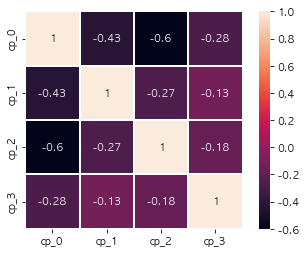

In [49]:
# 다중 범주형 변수들에 대한 원핫 인코딩 처리후 각 생성된 컬럼들에 대한 상관도 1 (cp)
sns.heatmap(h1_df[['cp_0','cp_1','cp_2','cp_3']].corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True)

<AxesSubplot:>

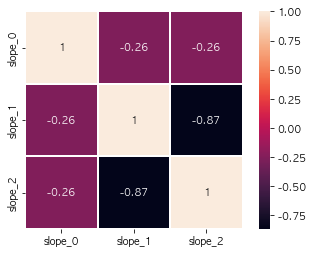

In [50]:
# 다중 범주형 변수들에 대한 원핫 인코딩 처리후 각 생성된 컬럼들에 대한 상관도 2 (slope)
sns.heatmap(h1_df[['slope_0','slope_1','slope_2']].corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True)

<AxesSubplot:>

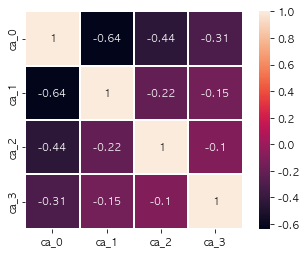

In [52]:
# 다중 범주형 변수들에 대한 원핫 인코딩 처리후 각 생성된 컬럼들에 대한 상관도 3 (ca)
sns.heatmap(h1_df[['ca_0','ca_1','ca_2','ca_3']].corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True)

<AxesSubplot:>

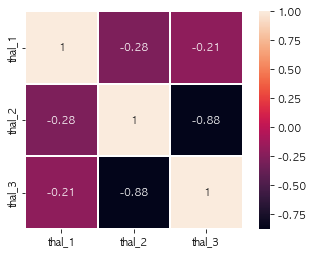

In [53]:
# 다중 범주형 변수들에 대한 원핫 인코딩 처리후 각 생성된 컬럼들에 대한 상관도 4 (thal)
sns.heatmap(h1_df[['thal_1','thal_2','thal_3']].corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True)

In [51]:
h1_df.columns

Index(['age', 'thalach', 'oldpeak', 'target', 'sex_0', 'sex_1', 'cp_0', 'cp_1',
       'cp_2', 'cp_3', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [41]:
# 연속형 변수들에 대한 정규화 작업
col_1 = ['oldpeak', 'thalach', 'age']

scaler = StandardScaler()  # 기본적인 standardscaler로 정규화
h1_df[col_1] = scaler.fit_transform(h1_df[col_1])

In [42]:
h1_df.head()

,age,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,-0.268437,0.821321,0.206584,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,-0.158157,0.255968,1.567082,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1.716595,-1.048692,1.320597,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0.724079,0.516900,-1.107114,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0.834359,-1.874977,0.910796,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [43]:
# X, y 설정
X = h1_df.drop(['target'], axis=1)
y = h1_df.target
print(X, y)

           age   thalach   oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  cp_3  \
0    -0.268437  0.821321  0.206584      0      1     1     0     0     0   
1    -0.158157  0.255968  1.567082      0      1     1     0     0     0   
2     1.716595 -1.048692  1.320597      0      1     1     0     0     0   
3     0.724079  0.516900 -1.107114      0      1     1     0     0     0   
4     0.834359 -1.874977  0.910796      1      0     1     0     0     0   
...        ...       ...       ...    ...    ...   ...   ...   ...   ...   
1020  0.503520  0.647366 -1.107114      0      1     0     1     0     0   
1021  0.613800 -0.352873  1.423069      0      1     1     0     0     0   
1022 -0.819834 -1.353113  0.206584      0      1     1     0     0     0   
1023 -0.488996  0.429923 -1.107114      1      0     1     0     0     0   
1024 -0.047877 -1.570556  0.552132      0      1     1     0     0     0   

      exang_0  ...  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_1  \
0     

In [44]:
# trein, test set 나누기
# random_state는 금일 날짜
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20210123)

In [45]:
# 로지스틱 회귀분석에서 가장 최적의 C값을 알기 위해 for문 사용 
c = [0.01, 0.1, 1, 10]
max_it = [500, 1000, 2000]
for i in range(len(c)):
    for j in range(len(max_it)):
        lr = LogisticRegression(C=c[i], max_iter=max_it[j])
        lr.fit(X_train,y_train)
        lr_pred = lr.predict(X_test)

        y_pred = lr.predict(X_test) 
        accuracy = acc_sc(y_test, lr_pred)

        print('--------------------------------------------------------------------')
        print('C={0:}, max_iter = {1:} 인 로지스틱 회귀 정확도 = {2:.4f}'.format(c[i], max_it[j], accuracy))
        print('ROC AUC curve = ', roc_auc_score(y_test, lr_pred))
        print(classification_report(y_test, y_pred))

--------------------------------------------------------------------
C=0.01, max_iter = 500 인 로지스틱 회귀 정확도 = 0.8390
ROC AUC curve =  0.8407593955831072
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        89
           1       0.88      0.83      0.85       116

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

--------------------------------------------------------------------
C=0.01, max_iter = 1000 인 로지스틱 회귀 정확도 = 0.8390
ROC AUC curve =  0.8407593955831072
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        89
           1       0.88      0.83      0.85       116

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

-------------------------------------------

C = 0.1, max_iter = 500 부터 가장 높은 정확도
정확도 최대 0.8780